# Homework 4: Graph Spectra

based on the paper “On Spectral Clustering: Analysis and an algorithm” by Andrew Y. Ng, Michael I. Jordan, Yair Weiss.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy
import os

%matplotlib inline

## Dataset 1 - Read data and visualize the graph

A real graph. This data set was prepared by Ron Burt. He dug out the 1966 data collected by Coleman, Katz and Menzel on medical innovation. They had collected data from physicians in four towns in Illinois, Peoria, Bloomington, Quincy and Galesburg.

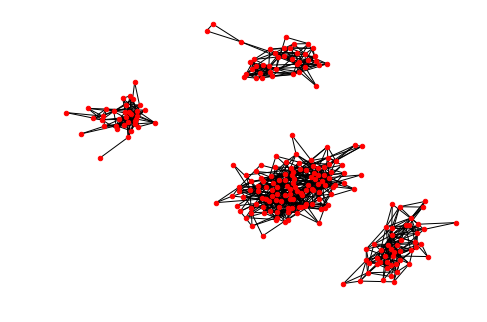

In [2]:
# Read data (graph edges)
data_path = os.path.join('data', 'example1.dat')
with open(data_path) as f:
    edges = [tuple([int(x) for x in line.strip().split(',')]) for line in f]

# Extract nodes
nodes = np.unique(np.asarray(edges))
n = len(nodes) #number of nodes

# Visualize graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20))
plt.show()

#We expect to have 4 clusters

### K-eigenvector Algorithm step-by-step

In [3]:
def k_eigenvector(G):
    
    edges = list(G.edges())
    n = len(G)
    
    #1. A: adjency matrix 
    A = np.zeros([n, n])
    for tup in edges:
        A[tup[0]-1, tup[1]-1] = 1
        A[tup[1]-1, tup[0]-1] = 1
    
    fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(1,2,1)
    plt.spy(A) 
    plt.title('Sparsity Pattern of A \n')

    #2. D: diagonal matrix
    D = np.diag(np.sum(A, axis=1))

    #2. L: normalized laplacian = D^(-1/2) * A * D^(-1/2)
    D_inv_sqrt = np.linalg.inv(np.sqrt(D))
    L = np.dot(np.dot(D_inv_sqrt, A), D_inv_sqrt)

    #3. Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L 
    w, v = scipy.linalg.eigh(L)
    print('Largest eigenvalues: \n', np.flip(w[-6:], axis=0))
    plt.subplot(1,2,2)
    plt.plot(w)
    plt.title('Eigenvalues distribution')
    plt.show()
    
    #3. Find optimal k (where the eigenvalues start dropping)
    #   chooses the highest elements with difference 0 from w
    k = np.argmin(np.ediff1d(np.flipud(w))) + 1 
    
    #3. Extract k largest eigenvectors
    X = v[:, n - k:]

    #4. Construct matrix Y by renormalizing X
    Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))

    #5. Cluster rows of Y into k clusters using K-means 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Y)

    #6. Assign original point i to the cluster of the row i of matrix Y
    nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=kmeans.labels_)
    
    return kmeans

Largest eigenvalues: 
 [1.         1.         1.         1.         0.83232272 0.77851335]


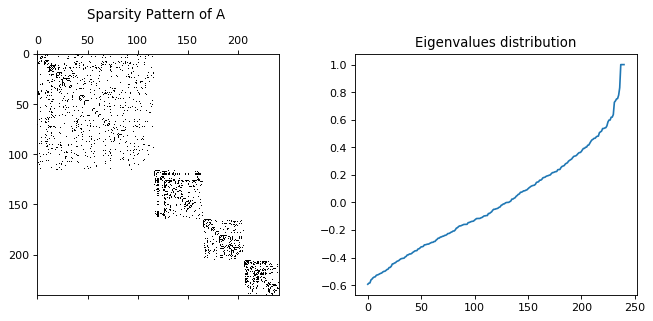

k = 4


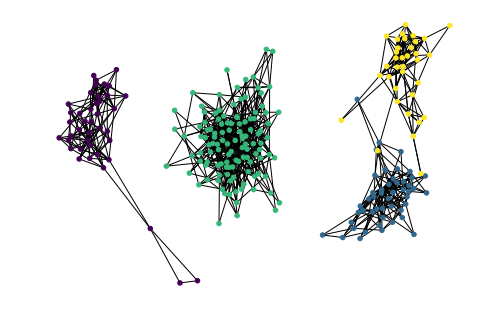

In [4]:
km = k_eigenvector(G)
print('k = %d' % km.n_clusters)

## Dataset 2 - Read data and visualize the graph

A synthetic graph

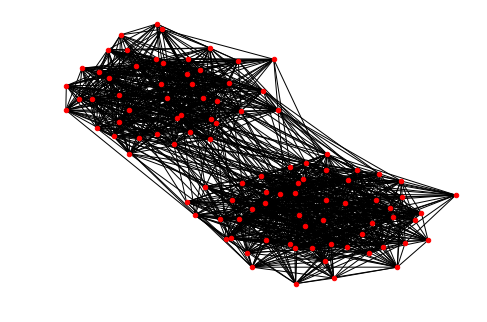

In [5]:
# Read data (graph edges)
data_path = os.path.join('data', 'example2.dat')
with open(data_path) as f:
    edges2 = [tuple([int(x) for x in line.strip().split(',')]) for line in f]

edges2 = [tuple([edge[0], edge[1]]) for edge in edges2] #remove weights
          
# Extract nodes
nodes2 = np.unique(np.asarray(edges2))
n2 = nodes2.shape[0]

# Visualize graph
G2 = nx.Graph()
G2.add_nodes_from(nodes2)
G2.add_edges_from(edges2)
nx.draw(G2, node_size=20, pos=nx.spring_layout(G2, k=0.05, iterations=20))
plt.show()

#We expect to have 2 clusters

### K-eigenvector algorithm applied on synthetic graph

Largest eigenvalues: 
 [1.         0.83442848 0.28933991 0.27065556 0.25333806 0.24913903]


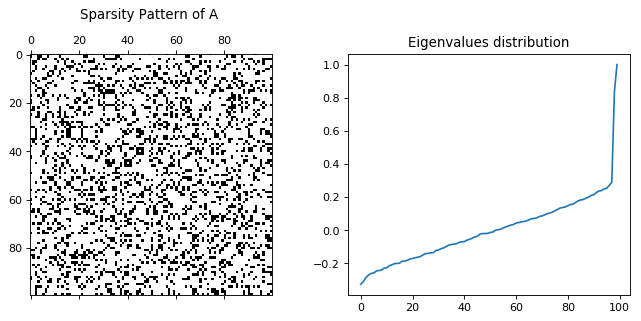

k = 2


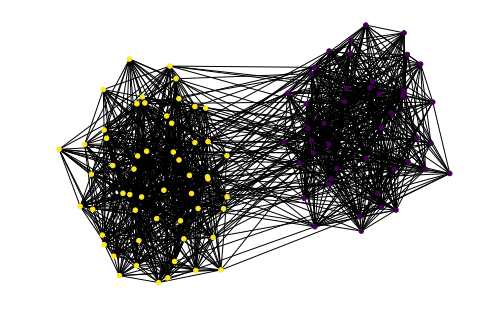

In [6]:
km = k_eigenvector(G2)
print('k = %d' % km.n_clusters)